In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess

In [2]:
limits = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]

In [6]:
for i in range(len(limits)):
    
    with open("EVCS_15_F1.gms","r") as f:
        list_of_lines = f.readlines()
        
    
    list_of_lines[14] = "grid_limit 'Desired max power from grid kW' /" + str(limits[i]) + "/\n"
    
    print(list_of_lines[14])
    
    with open("EVCS_15_F1.gms", "w") as f:
        f.writelines(list_of_lines)
        
    subprocess.run(["gams", "EVCS_15_F1.gms", "logOption", "2"])
    
    subprocess.run(["move", "EVCS_15_F1_results.db", "EVCS_15_F1_results_" + str(limits[i]) + ".db"], shell = True)
    
    print(limits[i])

grid_limit 'Desired max power from grid kW' /100/

100
grid_limit 'Desired max power from grid kW' /110/

110
grid_limit 'Desired max power from grid kW' /120/

120
grid_limit 'Desired max power from grid kW' /130/

130
grid_limit 'Desired max power from grid kW' /140/

140
grid_limit 'Desired max power from grid kW' /150/

150
grid_limit 'Desired max power from grid kW' /160/

160
grid_limit 'Desired max power from grid kW' /170/

170
grid_limit 'Desired max power from grid kW' /180/

180
grid_limit 'Desired max power from grid kW' /190/

190
grid_limit 'Desired max power from grid kW' /200/

200
grid_limit 'Desired max power from grid kW' /210/

210
grid_limit 'Desired max power from grid kW' /220/

220
grid_limit 'Desired max power from grid kW' /230/

230
grid_limit 'Desired max power from grid kW' /240/

240
grid_limit 'Desired max power from grid kW' /250/

250
grid_limit 'Desired max power from grid kW' /260/

260
grid_limit 'Desired max power from grid kW' /270/

270
grid_limit

In [15]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_15_F1_results*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[19:-3]] = grid_power['level'].copy()
    grid_ex_p[filename[19:-3]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[19:-3]] = grid_total_power['level'].copy()
    
    grid_e[filename[19:-3]] = grid_energy['level'].copy()
    grid_ex_e[filename[19:-3]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[19:-3]] = ESS_level['level'].copy()
    ESS_p[filename[19:-3]] = ESS_power['level'].copy()  
    
    sclrs[filename[19:-3]] = scalars['level'].copy()
    
    soc_pen[filename[19:-3]] = soc_penalty['level'].copy()



In [16]:
sclrs

,100,110,120,130,140,150,160,170,180,190,...,210,220,230,240,250,260,270,280,290,300
0,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,...,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500,173.962500
1,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,...,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500,222.597500
2,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,...,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900,264.809900
3,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,...,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200,180.003200
4,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,...,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500,225.507500
5,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,...,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000,30617.400000
6,161607.813799,156322.077004,152047.129461,148941.314545,146540.670615,144616.664813,143144.281250,142027.667800,141094.230769,140472.478033,...,139577.081887,139310.532719,139099.880579,138948.141823,138838.097668,138740.828653,138706.329125,138706.329125,138706.329125,138706.329125
7,71029.878180,70903.218559,70803.416032,70732.436217,70676.830531,70633.212716,70600.310425,70575.187856,70555.077808,70542.809869,...,70525.472094,70520.701277,70517.124610,70514.553818,70512.689370,70511.024350,70510.435137,70510.435137,70510.435137,70510.435137
8,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,...,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477
9,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,...,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482


In [17]:
#Scalar variables are collected in one DF. In this cell this df is cleaned and sorted

sclrs = sclrs.set_index(scalars['name'])
sclrs1 = sclrs.T
sclrs1['var_ESS_size'] = sclrs1['var_ESS_size'] * 1.25
sclrs1.index = sclrs1.index.astype(int)
sclrs1 = sclrs1.sort_index(ascending = True)
sclrs1['Grid Limit'] = np.array(limits)
sclrs1

name,var_ess_rated_power,var_grid_maxpower1,var_grid_maxpower2,var_grid_maxpower3,var_grid_maxpower4,var_ESS_cost,var_electricity_cost,var_grid_tariff_winter,var_energy_tax,months,var_system_cost,var_ESS_size,Grid Limit
100,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,161607.813799,71029.878180,3602.265477,4.283482,280567.977380,173.9625,100
110,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,156322.077004,70903.218559,3602.265477,4.283482,273478.804064,173.9625,110
120,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,152047.129461,70803.416032,3602.265477,4.283482,267731.237233,173.9625,120
130,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,148941.314545,70732.436217,3602.265477,4.283482,263051.047642,173.9625,130
140,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,146540.670615,70676.830531,3602.265477,4.283482,259272.139785,173.9625,140
150,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,144616.664813,70633.212716,3602.265477,4.283482,256238.935960,173.9625,150
160,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,143144.281250,70600.310425,3602.265477,4.283482,253805.468340,173.9625,160
170,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,142027.667800,70575.187856,3602.265477,4.283482,251842.608449,173.9625,170
180,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,70555.077808,3602.265477,4.283482,250226.181074,173.9625,180
190,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,140472.478033,70542.809869,3602.265477,4.283482,249221.896431,173.9625,190


Text(0.5, 1.0, 'System Cost vs. Peak Shaving Threshold')

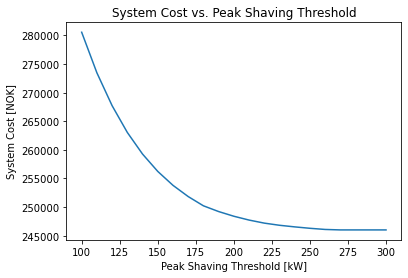

In [29]:
x = sclrs1['Grid Limit']
y = sclrs1['var_system_cost']
y1 = sclrs1['var_electricity_cost']

plt.plot(x,y)
plt.xlabel('Peak Shaving Threshold [kW]')
plt.ylabel('System Cost [NOK]')
plt.title('System Cost vs. Peak Shaving Threshold')

# Battery output

In [19]:
battery_1 = ESS_p['100']
battery_2 = ESS_p['200']
battery_3 = ESS_p['300']


discharge_1 = []
charge_1 = []
discharge_2 = []
charge_2 = []
discharge_3 = []
charge_3 = []

for i in range(len(battery_1)):
    if battery_1[i] < 0:
        charge_1.append(battery_1[i])
    elif battery_1[i] > 0:
        discharge_1.append(battery_1[i])
        
for i in range(len(battery_2)):
    if battery_2[i] < 0:
        charge_2.append(battery_2[i])
    elif battery_2[i] > 0:
        discharge_2.append(battery_2[i])
        
for i in range(len(battery_3)):
    if battery_3[i] < 0:
        charge_3.append(battery_3[i])
    elif battery_3[i] > 0:
        discharge_3.append(battery_3[i])
        

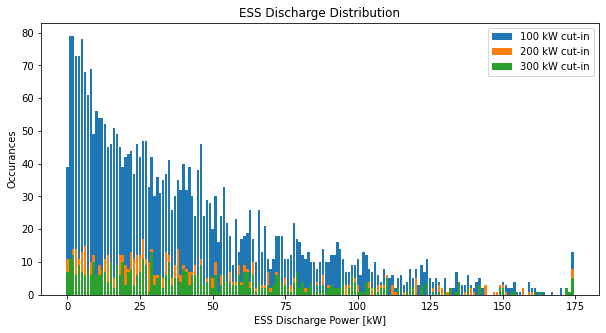

In [20]:
a = [round(num,0) for num in discharge_1]
#a = [round(num,0) for num in battery_1[u]]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names1 = list(aa.keys())
times1 = list(aa.values())

b = [round(num,0) for num in discharge_2]
bb = Counter(b)
bb = dict(bb)
names2 = list(bb.keys())
times2 = list(bb.values())

c = [round(num,0) for num in discharge_3]
cc = Counter(c)
cc = dict(cc)
names3 = list(cc.keys())
times3 = list(cc.values())



plt.figure(figsize = (10,5))
plt.bar(names1, times1, label = '100 kW cut-in')
plt.bar(names2, times2, label = '200 kW cut-in')
plt.bar(names3, times3, label = '300 kW cut-in')
plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')
plt.legend()

In [21]:
print(len(discharge_1), len(discharge_2), len(discharge_3))

3286 772 553


In [49]:
t = []

for i in range(len(ESS_p['270'])):
    if ESS_p['270'].iloc[i] > 0 and ESS_p['270'].iloc[i+2]  < 0:
        t.append(1)
    elif i > 41040:
        pass
    else:
        pass
    
len(t)

240

Text(0.5, 1.0, 'ESS Cycles vs. Peak Shaving Threshold')

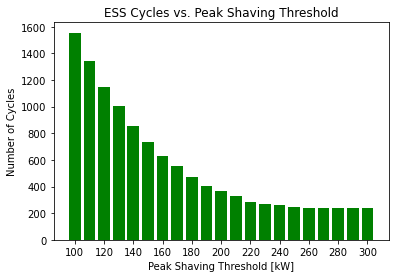

In [54]:
cycles = [1555,1341,1151,1008,856,731,629,555,473,407,366,327,281,266,261,250,240,240,240,240,240]
headers = ESS_p.columns.tolist()

plt.bar(headers,cycles,color = 'g')
plt.xticks(headers[::2])
plt.xlabel('Peak Shaving Threshold [kW]')
plt.ylabel('Number of Cycles')
plt.title('ESS Cycles vs. Peak Shaving Threshold')